<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/daje0601/pandas_study/main/kc_house_data.csv"

df = pd.read_csv(url)
df.isnull().sum() #데이터 결측치 확인 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
df["date"] = df["date"].str.strip("T000000") # float치환을 위한 문자열 제거
df["date"] = pd.to_numeric(df["date"]) # 숫자형 치환

condition1 = (df["date"] < 20150101) # 문제에서 주어진 조건으로 데이터 분리
condition2 = (df["date"] >= 20150101)
df1 = df[condition1]
df2 = df[condition2]

train_data = df1.sort_values("date") # 데이터 확인을 위한 date column 기준으로 정렬
test_data = df2.sort_values("date")

### 2) 두가지 이상 특성을 선택하여 특성공학(feature engineering)을 진행합니다. (kaggle notebook을 참고하여 중요한 특성을 고르는 것이 힌트입니다.)

### 저는 price와의 상관관계를 비교하여 상관계수가 0.59이상의 feature를 선택하여 분석을 진행하였습니다. 
### 상관계수가 1에 가까울수록 price feature와 연관이 있다고 생각하였기에 0.59이상의 데이터를 선택하였습니다. 


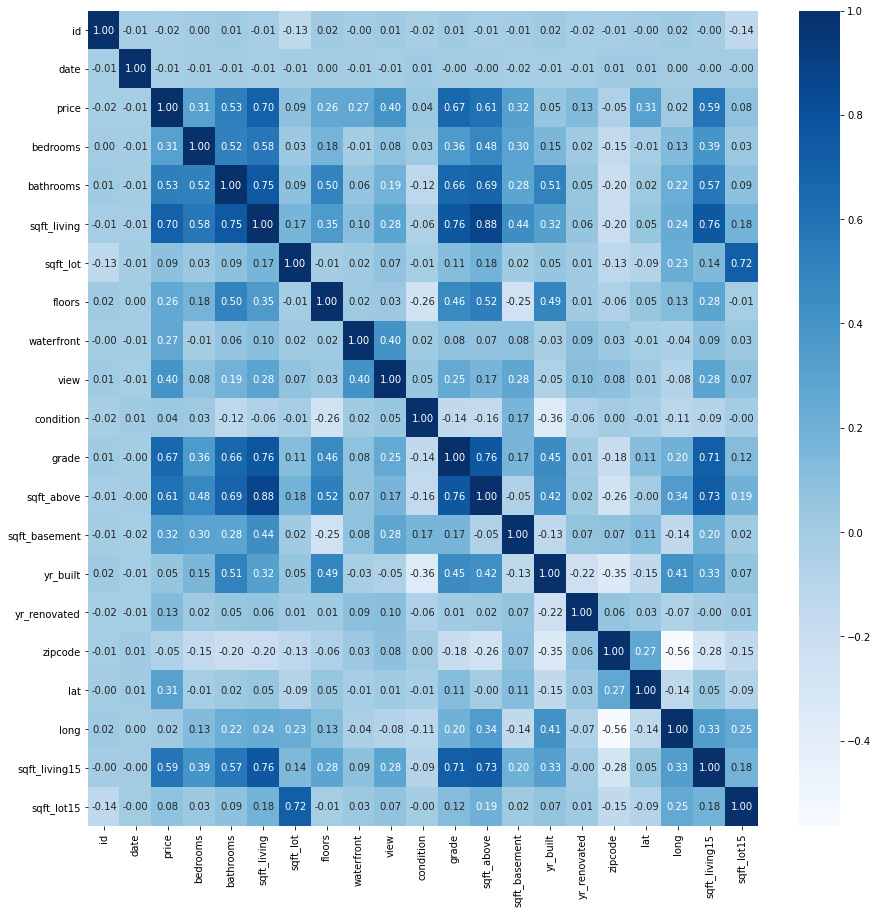

In [3]:
plt.figure(figsize=(15,15))
df = df.corr()
sns.heatmap(df, annot=True, fmt=".2f", cmap="Blues");

### 3) 다중선형회귀 모델을 만들어 보세요

In [4]:
from sklearn.linear_model import LinearRegression # 선형회귀 모델 import하였습니다. 
from sklearn.model_selection import train_test_split # 위에서 시간의 순서로 df을 나누었기에 본 과제에서는 사용하지 않았습니다. 


X_train = train_data[['sqft_living', 'grade', "sqft_above", "sqft_lot15"]]
y_train = train_data[['price']]
X_test = test_data[['sqft_living', 'grade', "sqft_above", "sqft_lot15"]]
y_test = test_data[['price']]

# shape를 확인하여 혹시 데이터 선택이 잘못되었는지 확인하였습니다. 
# 실제로 엉뚱한 값이 가져와서 분석하였습니다... shape를 사용하지 않았다면 실수할 뻔 하였습니다. 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)
y_test_prediction = model.predict(X_test)
y_test_prediction # 모델 테스트 진행

(15309, 4)
(15309, 1)
(6304, 4)
(6304, 1)


array([[396452.58627248],
       [564605.68107326],
       [892061.54539484],
       ...,
       [410422.20432493],
       [273603.45653102],
       [926554.9062274 ]])

### 4) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.

In [5]:
print(f"coefficients:{model.coef_}")
print(f"intercept:{model.intercept_}")

coefficients:[[ 2.39320962e+02  1.05964897e+05 -7.24955725e+01 -5.12049636e-01]]
intercept:[-639378.37593259]


### 5) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요

In [6]:
#테스트 에러: 234984.01

train_data["price"].mean()
target = 'price'
y_train = train_data[target]
y_test = test_data[target]
predict = y_train.mean()

from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

훈련 에러: 233241.54
테스트 에러: 234984.01


In [7]:
from sklearn.metrics import mean_squared_error # MSE를 만든 선형회귀 모델을 평가하고자 함 
MSE = (mean_squared_error(y_test, y_test_prediction) ** 0.5)
# 특징 : 특이치에 매우 민감하다(제곱을 해주니까!)

RMSE = np.sqrt(MSE)
# 정의 : MSE에 루트를 쓰어서 정의함 
# 특징 : RMSE를 사용하면 오류 지표를 실제 값과 유사한 단위로 다시 변환하여 해석을 쉽게 가능함 

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_test_prediction)
# 특징
#절대값을 취하기 때문에 가장 직관적으로 알 수 있는 지표입니다.
#절대값을 취하기 때문에 모델이 underperformance 인지 overperformance 인지 알 수 없습니다.
#underperformance: 모델이 실제보다 낮은 값으로 예측함
#overperformance: 모델이 실제보다 높은 값으로 예측함

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_prediction)

print(f" MSE : {MSE:.2f}")
print(f"RMSE : {RMSE:.2f}")
print(f" MAE : {MAE:.2f}")
print(f"  r2 : {r2:.2f}")

 MSE : 254362.97
RMSE : 504.34
 MAE : 168382.53
  r2 : 0.52


## 다항회귀 학습전 MAE : 234984.01
## 다항회귀 학습후 MAE : 168382.53  
  
## 학습 후 MAE가 감소하는 것을 확인 할 수 있었습니다.  
## MAE가 감소하는 것은 머신러닝 모델의 성능이 좋아졌다는 것을 의미합니다.

### 6) 테스트데이터에 관해 가장 잘 나온 MSE 스코어를 서로 공유해 보세요

In [8]:
# 매번 동일한 랜덤 값이 나올 수 있도록 해주는 random_state=5 를 삭제 후
# 반복문을 통해 총 5회중 가장 작은 MSE값 출력예정 

n=0
list = []
while n < 5 : 
  X_train = train_data[['sqft_living', 'grade', "sqft_above", "sqft_lot15"]]
  y_train = train_data[['price']]
  X_test = test_data[['sqft_living', 'grade', "sqft_above", "sqft_lot15"]]
  y_test = test_data[['price']]

  model = LinearRegression()
  model.fit(X_train,y_train)
  y_test_prediction = model.predict(X_test)
  y_test_prediction
  
  MSE = (mean_squared_error(y_test, y_test_prediction) ** 0.5)

  n += 1
  print(f"---{n}회차 테스트 결과값----")
  list.append(MSE)
  print(f"MSE : {MSE}")
  print()

print(f"가장 작은 MSE : {min(list):.2f}")

---1회차 테스트 결과값----
MSE : 254362.9718244946

---2회차 테스트 결과값----
MSE : 254362.9718244946

---3회차 테스트 결과값----
MSE : 254362.9718244946

---4회차 테스트 결과값----
MSE : 254362.9718244946

---5회차 테스트 결과값----
MSE : 254362.9718244946

가장 작은 MSE : 254362.97


In [9]:
# N의 횟수를 늘리면 더 적은 MSE값이 나오는지 확인 하기 위한 코드 : 예상 아닐거 같다..그러나해보고 싶다..ㅎ

n=0
list = []
while n < 500 : 
  X_train = train_data[['sqft_living', 'grade', "sqft_above", "sqft_lot15"]]
  y_train = train_data[['price']]
  X_test = test_data[['sqft_living', 'grade', "sqft_above", "sqft_lot15"]]
  y_test = test_data[['price']]

  model = LinearRegression()
  model.fit(X_train,y_train)
  y_test_prediction = model.predict(X_test)
  y_test_prediction
  
  MSE = (mean_squared_error(y_test, y_test_prediction) ** 0.5)

  n += 1

  list.append(MSE)

print(f"---{n}회차 테스트 결과값----")
print(f"가장 작은 MSE : {min(list):.2f}")
print()
print("예한대로 큰 변화는 없는 것으로 사료됨")

---500회차 테스트 결과값----
가장 작은 MSE : 254362.97

예한대로 큰 변화는 없는 것으로 사료됨


## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)